# 3 . softmax多分类任务
## 3.1 任务概述
采用全连接神经网络，实现对Fashion MNIST的分类。Fashion MNIST 数据集包含 70000 张灰度图像，涵盖 10
个类别。我们将使用 60000 张图像训练网络，并使用 10000 张图像评估经过学习的网络分类图像的准确率。
可以从 TensorFlow 直接访问 Fashion MNIST，只需导入和加载数据即可。

## 3.2 数据准备

Tensorflow Version: 2.0.0
train_image shappe:(60000, 28, 28)
test_image shape:(10000, 28, 28)


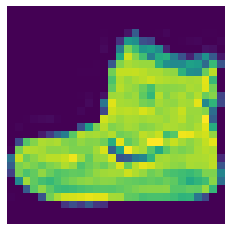

In [7]:
import tensorflow as tf
print('Tensorflow Version: {}'.format(tf.__version__))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#图像，标签，测试图像与标签
(train_image, train_lable), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()
print("train_image shappe:{}\ntest_image shape:{}".format(train_image.shape,test_image.shape))
plt.imshow(train_image[0])
plt.axis("off")
plt.show()
#归一化
train_image = train_image/255
test_image = test_image/255

## 3.3 建立模型并训练

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))
model.summary()
model.compile(optimizer = "adam",loss='sparse_categorical_crossentropy',metrics=['acc'])
model.fit(train_image,train_lable,epochs=5)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 138us/sample - loss: 3.1367 - acc: 0.6865
Epoch 2/5
60000/60000 [==============================] - 8s 130us/sample - loss: 0.6911 - acc: 0.7243
Epoch 3/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.6168 - acc: 0.7527
Epoch 4/5
60000/60000 [==========================

In [12]:
#评价
model.evaluate(test_image, test_label)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.5249296184539795, 0.8244]

# 3.5 采用one-hot编码方式训练

In [13]:
train_label_onehot = tf.keras.utils.to_categorical(train_lable)
test_label_onehot = tf.keras.utils.to_categorical(test_label)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  # 28*28
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc']
)
model.fit(train_image, train_label_onehot, epochs=5)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 148us/sample - loss: 3.9736 - acc: 0.7085
Epoch 2/5
60000/60000 [==============================] - 7s 122us/sample - loss: 0.6800 - acc: 0.7587
Epoch 3/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.6008 - acc: 0.7850
Epoch 4/5
60000/60000 [==========================

In [15]:
#评价
model.evaluate(test_image, test_label_onehot)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.5642493257284165, 0.8031]